# Signal Energy

Signal energy could be think as "signal strength". Mathematically, the autocorrelation of a signal could be interpreted as the strength of similarity of the signal in a manner consistent with the way we measure signal energy.

So, signal energy could be calculate as:

$E_x=\int_{-\infty}^{\infty} |x(t)|^2 \,dt = \frac{1}{2\pi} \int_{-\infty}^{\infty} |X(\omega)|^2 \,d\omega = \int_{-\infty}^{\infty} |X(2\pi f)|^2 \,df$ 

(aka. **Parseval's theorem** for the Fourier Transform)

This allows us to determine the signal energy from either the time-domain $x(t)$ or the frequency-domain $X(\omega)$ of the signal

If we consider the small band of frequencies $\Delta \omega$ ($\Delta \omega \rightarrow 0$) located at $\omega = k \Delta \omega$, we could calculate the energy $\Delta E_x$ as:

$\Delta E_x = \frac{1}{2\pi} |X(k\Delta \omega)|^2 \Delta \omega = |X(k\Delta\omega)|^2 \Delta f$

![](figures/energy-espectral-density.jpg)

$|X(\omega)|^2 \Delta f$ represents the energy contibuted by the components in a band of $\Delta f$ Hz.

Therefore, $|X(\omega)|^2$ is the **energy spectral density** (per unit bandwidth in Hz)

In [185]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.fft import fft
from scipy.signal import welch

plt.style.use('dark_background')

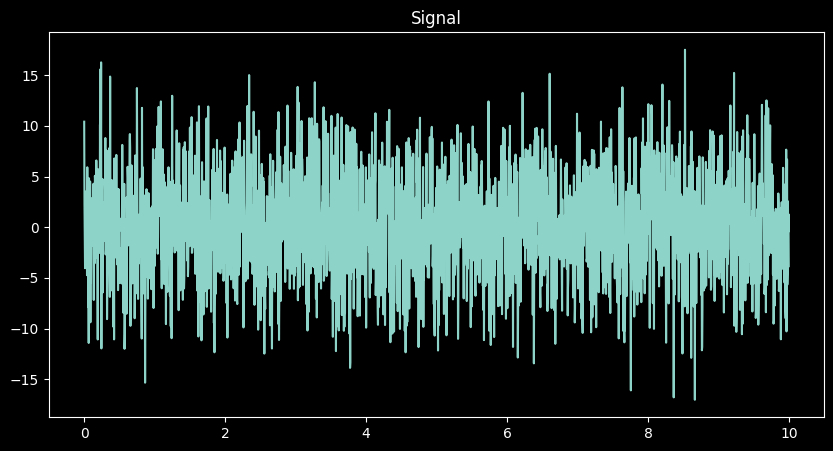

In [144]:
fs = 250
L = 50
t = np.linspace(0,L,fs*L)
sig = np.sin(2*np.pi*t) + np.sin(10*2*np.pi*t) + 5*np.random.normal(0,1,fs*L)

plt.figure(figsize=(10,5))
plt.title('Signal')
plt.plot(t[:10*fs],sig[:10*fs])
plt.show()

# Signal Power

We can extend the idea of energy spectral density to:

$P_x = \lim_{T \to \infty} \frac{1}{T} \int_{-T/2}^{T/2} |x(t)|^2 \,dt =  \lim_{T \to \infty} \frac{1}{T} \int_{-\infty}^{\infty} |x_T(t)|^2 \,dt = \lim_{T \to \infty} \frac{E_{x_T}}{T}$

where $x_T(t) = x(t) \Pi(\frac{t}{T})$

So:

$P_x = \lim_{T \to \infty} \frac{1}{2\pi} \int_{-\infty}^{\infty} \frac{|X_T(\omega)|^2}{T} \,d\omega = \frac{1}{2\pi} \int_{-\infty}^{\infty} S_x(\omega) \,d\omega$

where $S_x(\omega)$ is the **power spectral density** (PSD) of $x(t)$ and it is defined by:

$S_x(\omega) = \lim_{T \to \infty} \frac{|X_T(\omega)|^2}{T}$

Unlike the Fourier, PSD does not contain phase information so it is not invertible (so it is not possible to reconstruct the signal from the PSD). However, PSD has a wider range of applicability and can be defined for signals that becomes from random processes (biosignals)

## Power Spectral Density

### Spectral Stimation de PSD

*Aim*: Find an stimator $\hat{S_x}$ from N timepoints of a signal $x(t)$ that is stationary in wide sense

There are 2 kinds of stimators:

1. **No-parametric**: The main is to reduce the variance of the periodogram but lower the frequency resolution

a)*Periodogram:* Modulus squared of the Discrete Time Fourier Transform


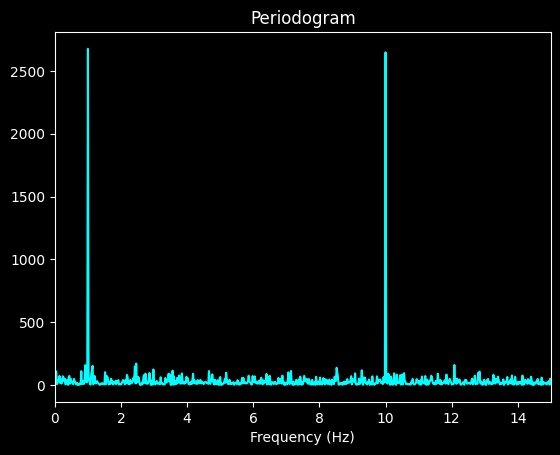

In [150]:
TFsig = fft(sig)
periodogram = np.abs(TFsig)**2 / len(TFsig)
f_p = np.linspace(0,fs//2,len(TFsig)//2)

plt.figure()
plt.plot(f_p, periodogram[:len(periodogram)//2], color='cyan')
plt.title('Periodogram')
plt.xlim(0,15)
plt.xlabel('Frequency (Hz)')
plt.show()

b) *Correlogram:* Discrete Time Fourier Transform of the autocorrelation stimator

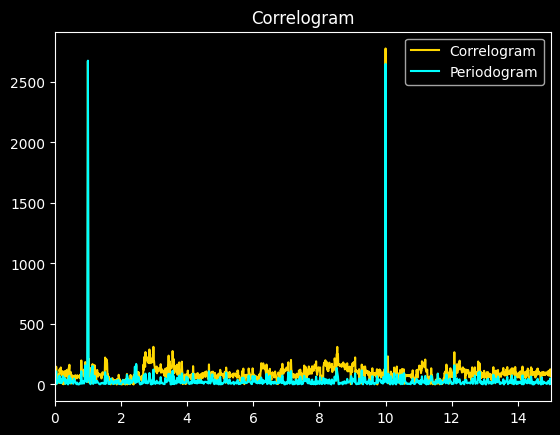

In [151]:
conv = np.convolve(sig,sig[::-1])
L = np.arange(-len(sig)+1,len(sig))
Rx = np.ndarray(shape=len(L), dtype=float)

# Unbiased correlation
for i in L:
    Rx[i] = conv[i]/(len(sig)-np.abs(L[i]))

Sx = np.abs(fft(Rx))/2
f_Sx = np.linspace(0,fs/2,len(Sx)//2)
plt.figure()
plt.plot(f_Sx,Sx[:len(Sx)//2],label='Correlogram', color='gold')
plt.plot(f_p, periodogram[:len(periodogram)//2], label='Periodogram', color='cyan')
plt.legend()
plt.xlim(0,15)
plt.title('Correlogram')
plt.show()

c) *Barlett Method:* Divide the signal in K parts and calculate the periodogram of each, the resulting stimator is the mean of them

50


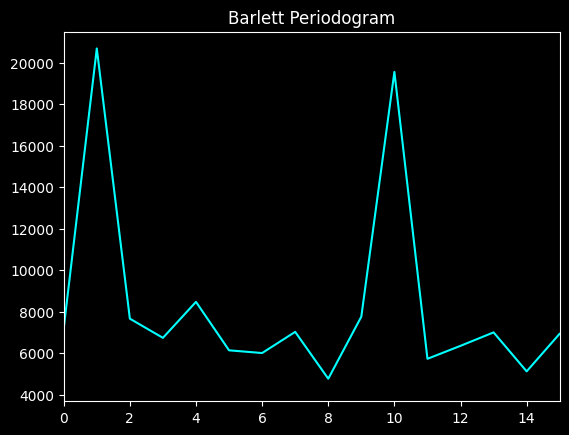

In [183]:
def barlett_periodogram(sig,L):
    n_segments = len(sig)//L
    print(n_segments)
    periodogram = np.zeros(L)
    for i in range(n_segments):
        segment=sig[i*L:(i+1)*L]
        periodogram += np.abs(fft(segment))**2
    periodogram = periodogram/n_segments
    return periodogram

plt.figure()
plt.plot(barlett_periodogram(sig,250), color='cyan')
plt.title('Barlett Periodogram')
plt.xlim(0,15)
plt.show()

d) *Welch Method:* Dicide the signal in K parts of length L that are overlapped, the resulting stimator is the mean of them

In [188]:
we

(array([  0.,   2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.,  20.,
         22.,  24.,  26.,  28.,  30.,  32.,  34.,  36.,  38.,  40.,  42.,
         44.,  46.,  48.,  50.,  52.,  54.,  56.,  58.,  60.,  62.,  64.,
         66.,  68.,  70.,  72.,  74.,  76.,  78.,  80.,  82.,  84.,  86.,
         88.,  90.,  92.,  94.,  96.,  98., 100., 102., 104., 106., 108.,
        110., 112., 114., 116., 118., 120., 122., 124.]),
 array([0.04880264, 0.23926621, 0.22888826, 0.20484805, 0.2194379 ,
        0.35311805, 0.23849913, 0.19842952, 0.22638319, 0.20505422,
        0.20560822, 0.18627769, 0.16984663, 0.1825075 , 0.18352596,
        0.181066  , 0.17342851, 0.18532227, 0.17001667, 0.19653603,
        0.21260163, 0.20230582, 0.20783586, 0.2114714 , 0.19795742,
        0.19345764, 0.20180667, 0.20574949, 0.18521021, 0.19996555,
        0.21998104, 0.20532066, 0.19323648, 0.17220945, 0.17022466,
        0.19782707, 0.18993763, 0.19892918, 0.20078589, 0.23594438,
        0.23343097, 0.229559

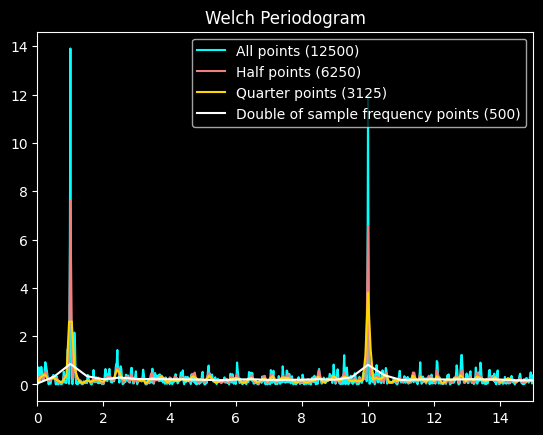

In [215]:
f_1, we_1 = welch(sig, fs=fs, nperseg=len(sig))
f_2, we_2 = welch(sig, fs=fs, nperseg=len(sig)//2)
f_3, we_3 = welch(sig, fs=fs, nperseg=len(sig)//4)
f_4, we_4 = welch(sig, fs=fs, nperseg=2*fs)

plt.figure()
plt.plot(f_1, we_1, color='cyan', label=f'All points ({len(sig)})')
plt.plot(f_2, we_2, color='lightcoral', label=f'Half points ({len(sig)//2})')
plt.plot(f_3, we_3, color='gold',label=f'Quarter points ({len(sig)//4})')
plt.plot(f_4, we_4, color='white',label=f'Double of sample frequency points ({2*fs})')
plt.title('Welch Periodogram')
plt.xlim(0,15)
plt.legend()
plt.show()

2. **Parametric:** Express the system as a differential equation $y{n} + \sum_{i=1}^{K} a_i y[n-i] = \sum_{j=0}^{L} x[n-j]$
    * *AR processes:* $a_i = 0 \rightarrow y[n] = \sum_{j=0}^{L} b_k x[n-j]$
    * *MA processes:* $b_j = 0 \rightarrow y[n] + \sum_{i=1}^{K} a_i y[n-i] = x[n]$